## Final Project Submission - Sell My Home (SMH) 

Credentials:
* Student name: Jacob Tadesse
* Student pace: part-time
* Scheduled project review date/time: TBD
* Instructor name: Brandon Lewis
* Blog post URL: TBD

### Exploring the Dataset:

Here I'm previewing the first five rows of data to do some initial exploration. 

In [270]:
print('KC Dataset - RAW VERSION (Preview)')
print('\n.............................')
display(kd.head())

KC Dataset - RAW VERSION (Preview)

.............................


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


After initial review, the preview shows us 5 rows and 21 columns. I noticed that most columns contained numerical values. There is no consistent scale, and I also see couple `NaN` values in `'waterfront'` and `'yr_renovated'`. 

Below, I want to see how these values are stored in the Pandas DataFrame, and get a better sense of the structure.

In [271]:
print('KC Dataset - RAW (Information)')
print('\n.............................\n')
display(kd.info())

KC Dataset - RAW (Information)

.............................

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: floa

None

Our findings.
* We can see that most of the values are numeric, (8) `'float64'` and (11)`'int64'`. 
* We also see (2) numerical columns saved as (2) objects. 
* We can see values missing from `'waterfront'`, `'yr_renovated'`, and `view`. 
* We have `21,597` total records in the dataset.

Let's recap. 
* We have two columns with `NaN` values.
* We have three columns with missing values.

### Cleaning the Dataset:

Here I'll change the date of sale to a friendlier format, `'datetiem64[ns]'`, using built-in Pandas' tools.

In [272]:
kd['date'] =  pd.to_datetime(kd['date'],
                              format='%m/%d/%Y')

In [273]:
kd.info() # Just checking to see if the date was changed here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

Now let's take a look at the data statistics in a glance using more built-in Pandas' tools.

In [1]:
kd.date.sort_values().head

NameError: name 'kd' is not defined

In [274]:
print('KC Dataset - RAW (Statistics)')
print('\n.............................\n')
kd.describe()

KC Dataset - RAW (Statistics)

.............................



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


By viewing the DataFrame statistics, we can see which features share a common distribution by comparing each features `'mean'` against the corresponding `'median'`. Features that catch my eye with normalish distribution are as follows: `price`, `bedrooms`, `bathrooms`, `sqft_living`, `floors`, `view`, `condition`, `grade`, `yr_built`, `zipcode`, `lat`, `long`.

Next I will checking for null values in the columns that showed missing values.

In [275]:
kd.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Next, I will determine the percent of values missing for each feature, from the entire dataset:

In [276]:
# Number of missing records from waterfront, view, and yr_renovated

water_nan = len(kd[kd.waterfront.isna() == True]) 
view_nan = len(kd[kd.view.isna()== True]) 
reno_nan = len(kd[kd.yr_renovated.isna()== True]) 

# List of all features with missing records vs total records

num_missing_values = [water_nan, view_nan, reno_nan] 
tot_values = len(kd) 

# for loop to print the percent of each missing feature
for num in num_missing_values:

    print('{}% missing'.format(((num / tot_values)*100)))

11.00152798999861% missing
0.29170718155299347% missing
17.78950780200954% missing


Since view is less than 1%, I will drop those missing records. 

In [277]:
kd.dropna(axis=0,subset=['view']).isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Using `dropna`, we can remove the individual records missing vales.

In [278]:
kd = kd.dropna(axis=0,subset=['view'])

Since we are cleaning the data, I want to focus on family size homes that are normally less than 5 bedrooms, so here I will drop the records with more than 5 bedrooms from the data set.

In [279]:
kd = kd[kd.bedrooms <5]
kd.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.960600e+04,1.960600e+04,19606.000000,19606.000000,19606.000000,1.960600e+04,19606.000000,17445.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,16108.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000
mean,4.591369e+09,5.149427e+05,3.189687,2.043941,1979.130980,1.490293e+04,1.484877,0.007051,0.215138,3.405590,7.600071,1724.889881,1970.895185,80.409300,98078.521728,47.558573,-122.214494,1944.415689,12696.679588
std,2.880892e+09,3.188646e+05,0.703311,0.714691,826.492169,4.133352e+04,0.542612,0.083674,0.734286,0.649043,1.138041,769.810606,29.293221,392.466158,53.447763,0.140158,0.142479,656.595291,27603.326194
min,1.200019e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.125570e+09,3.150000e+05,3.000000,1.500000,1380.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,1951.000000,0.000000,98033.000000,47.464800,-122.331000,1470.000000,5040.000000
50%,3.904910e+09,4.400000e+05,3.000000,2.000000,1830.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,1975.000000,0.000000,98070.000000,47.570400,-122.234000,1800.000000,7546.500000
75%,7.334602e+09,6.200000e+05,4.000000,2.500000,2420.000000,1.045400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2120.000000,1996.000000,0.000000,98118.000000,47.679100,-122.124000,2310.000000,9998.000000
max,9.900000e+09,4.490000e+06,4.000000,5.750000,7850.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Next, I will drop the features `waterfront` and `yr_renovated`, since over 10% of the values are missing and will produce bias in our analysis.

In [280]:
kd = kd.drop(axis=1,labels=['waterfront', 'yr_renovated'])

In [281]:
display(kd.info())
kd.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19606 entries, 0 to 21596
Data columns (total 19 columns):
id               19606 non-null int64
date             19606 non-null datetime64[ns]
price            19606 non-null float64
bedrooms         19606 non-null int64
bathrooms        19606 non-null float64
sqft_living      19606 non-null int64
sqft_lot         19606 non-null int64
floors           19606 non-null float64
view             19606 non-null float64
condition        19606 non-null int64
grade            19606 non-null int64
sqft_above       19606 non-null int64
sqft_basement    19606 non-null object
yr_built         19606 non-null int64
zipcode          19606 non-null int64
lat              19606 non-null float64
long             19606 non-null float64
sqft_living15    19606 non-null int64
sqft_lot15       19606 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(11), object(1)
memory usage: 3.0+ MB


None

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.960600e+04,1.960600e+04,19606.000000,19606.000000,19606.000000,1.960600e+04,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000
mean,4.591369e+09,5.149427e+05,3.189687,2.043941,1979.130980,1.490293e+04,1.484877,0.215138,3.405590,7.600071,1724.889881,1970.895185,98078.521728,47.558573,-122.214494,1944.415689,12696.679588
std,2.880892e+09,3.188646e+05,0.703311,0.714691,826.492169,4.133352e+04,0.542612,0.734286,0.649043,1.138041,769.810606,29.293221,53.447763,0.140158,0.142479,656.595291,27603.326194
min,1.200019e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.125570e+09,3.150000e+05,3.000000,1.500000,1380.000000,5.000000e+03,1.000000,0.000000,3.000000,7.000000,1170.000000,1951.000000,98033.000000,47.464800,-122.331000,1470.000000,5040.000000
50%,3.904910e+09,4.400000e+05,3.000000,2.000000,1830.000000,7.500000e+03,1.000000,0.000000,3.000000,7.000000,1520.000000,1975.000000,98070.000000,47.570400,-122.234000,1800.000000,7546.500000
75%,7.334602e+09,6.200000e+05,4.000000,2.500000,2420.000000,1.045400e+04,2.000000,0.000000,4.000000,8.000000,2120.000000,1996.000000,98118.000000,47.679100,-122.124000,2310.000000,9998.000000
max,9.900000e+09,4.490000e+06,4.000000,5.750000,7850.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,7850.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


What Changed?
* We now have a dataset with `19` columns and `19,606` records. 
* We lost two columns, and lost almost 10% of `21,597` . 

What does that mean?
* This proves our assumtion, showing that **90% of homes sold were under 5 bedrooms!**

What's next?
* Let's create a better dataset to focus on features with a more normal distribution.

In [282]:
columns_to_keep = ['date','price', 'bedrooms', 'bathrooms',
                   'sqft_living','floors', 'view', 'condition', 
                   'grade', 'yr_built', 'zipcode','lat', 'long']

Our focus:
* Let's focus on `13` features to start. 
* We'll create a new dataset that only includes these more tailored features

The new dataset will contain: 
* ['dates'] as `datetime64`
* ['price', 'bathrooms', 'floors', 'view', 'lat' and 'long'] as `float64`
* ['bedrooms', 'sqft_living', 'condition', 'grade', 'yr_built' and 'zipcode'] as `int64`

In [283]:
new_kd = kd[columns_to_keep].copy() # making a copy of the DataFrame

Now, let's view the distribution using a histogram plot.

### Visual Exploration of the Dataset

* Question - Is our assumption correct about the distribution?

Distribution of Selected Features


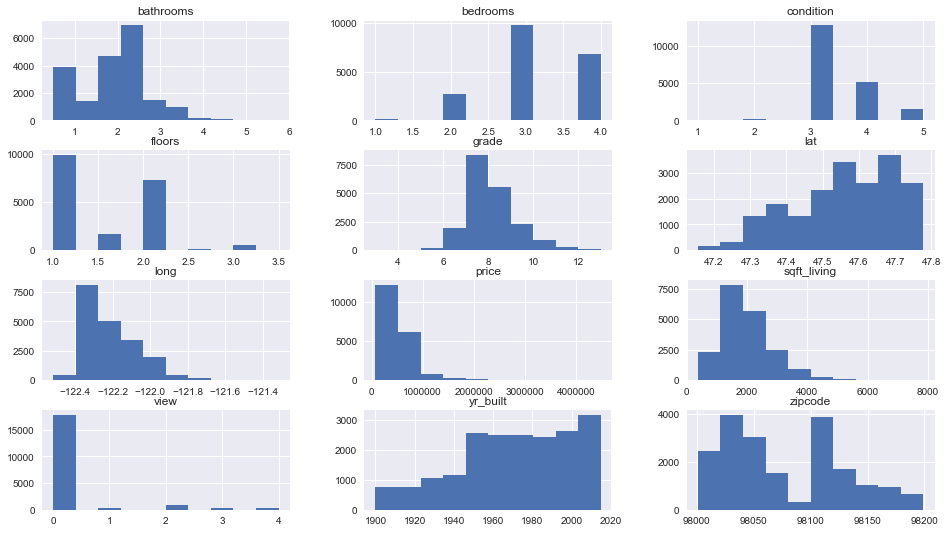

In [284]:
print('Distribution of Selected Features')
new_kd.hist(figsize=(16,9));

We can see here that someof the features we selected are categorical in nature. Let's determine which `features` to convert into `categories`, and which `features` are continous and need to be `normalized & scaled`.

* categoricals = ['bedrooms', 'floors', 'condition', 'view']
* categories_to_bin = ['bathrooms', 'zipcode', 'yr_built']
* continuous = ['price', lat', 'long', 'sqft_living']

#### Investigating Distributions
* Here I will use a Scatter Matrix to compare each individual feature against one another. 

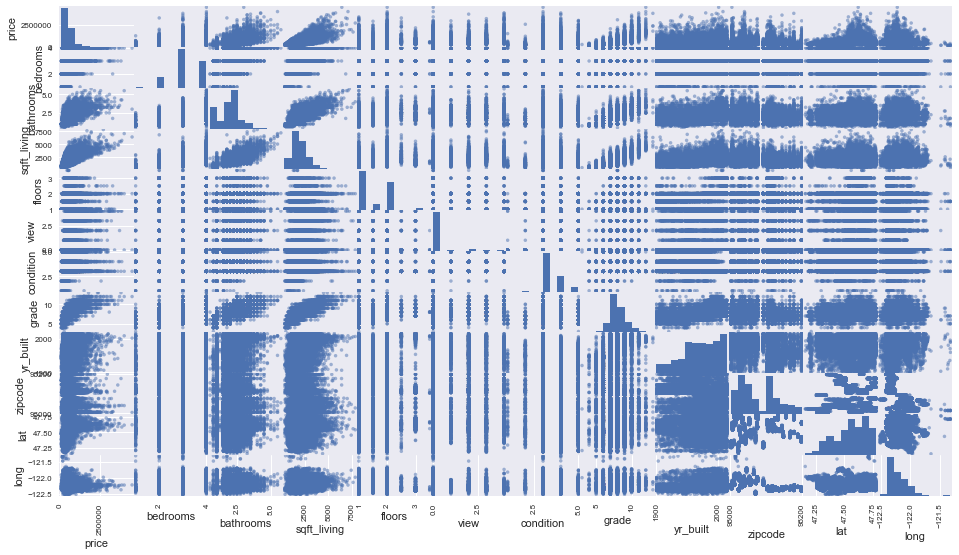

In [285]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

pd.plotting.scatter_matrix(new_kd, figsize=(16,9));
plt.show()

#### Investigation Correlations
* Here I will use a Correlation Matrix to determine the correlation amongst the features. 

In [286]:
new_kd.corr()

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,yr_built,zipcode,lat,long
price,1.000000,0.276682,0.491460,0.679758,0.250129,0.388179,0.039723,0.665199,0.055127,-0.034627,0.332299,0.025473
bedrooms,0.276682,1.000000,0.491233,0.562677,0.202992,0.043547,0.015153,0.390289,0.229728,-0.197951,-0.053820,0.188245
bathrooms,0.491460,0.491233,1.000000,0.727288,0.522507,0.158372,-0.134089,0.663960,0.544270,-0.214802,0.008439,0.240924
sqft_living,0.679758,0.562677,0.727288,1.000000,0.352717,0.257766,-0.066887,0.763788,0.341850,-0.204610,0.037495,0.261262
floors,0.250129,0.202992,0.522507,0.352717,1.000000,0.016424,-0.267615,0.457438,0.511445,-0.061703,0.049748,0.121526
view,0.388179,0.043547,0.158372,0.257766,0.016424,1.000000,0.045617,0.227610,-0.063334,0.095633,0.002225,-0.084826
condition,0.039723,0.015153,-0.134089,-0.066887,-0.267615,0.045617,1.000000,-0.152736,-0.358805,0.002241,-0.016064,-0.103776
grade,0.665199,0.390289,0.663960,0.763788,0.457438,0.227610,-0.152736,1.000000,0.460758,-0.178718,0.110770,0.202054
yr_built,0.055127,0.229728,0.544270,0.341850,0.511445,-0.063334,-0.358805,0.460758,1.000000,-0.349364,-0.148446,0.406314
zipcode,-0.034627,-0.197951,-0.214802,-0.204610,-0.061703,0.095633,0.002241,-0.178718,-0.349364,1.000000,0.277015,-0.565103


* Here I will use a Correlation Matrix to determine which features have a correlation over 75%.

In [287]:
new_kd.corr()[new_kd.corr() > 0.75]

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,yr_built,zipcode,lat,long
price,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.763788,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
grade,NaN,NaN,NaN,0.763788,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
yr_built,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


* We can see a high correlation amongst `grade`, `sqft_living`, and `bathrooms`. 
* We see the correlation is highest between `sqft_living` and both `grade & bathrooms`

#### Visualizing feature correlation. 

* Here is a visual representation multicolinearity.
* You can se the lighter the color the higher the colinearity between features.

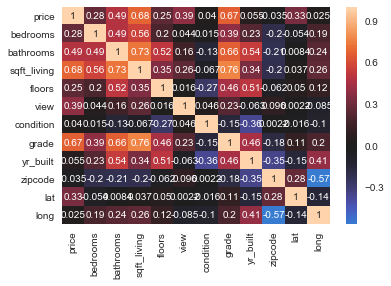

In [288]:
import seaborn as sns
sns.heatmap(new_kd.corr(), center=0, fmt='.2g', annot=True);

But how do we handle this?
* since `sqft_living` has a higher correlation to `price` 
* we can remove the feature `grade` 

We'll assume that the remaining features will act independently in our prediction model.

In [289]:
new_kd = new_kd.drop(axis=1,labels=['grade']) # dropping 'grade' feature

In [290]:
new_kd.corr()[new_kd.corr() > 0.75] # checking for multicolinearity

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,yr_built,zipcode,lat,long
price,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
yr_built,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
lat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


#### Linearity Assumption Check 
* In case the table and heatmap are not easily read, we will check linearity for all chosen features
* We will use scatter plots to plot each `feature` against the `price`

In [291]:
# setting variable for features to check using .columns
lin_check = new_kd.columns 

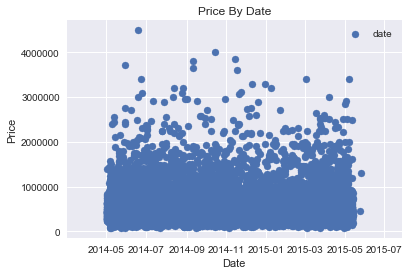

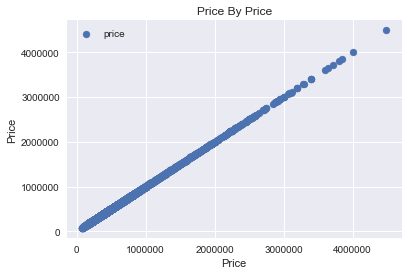

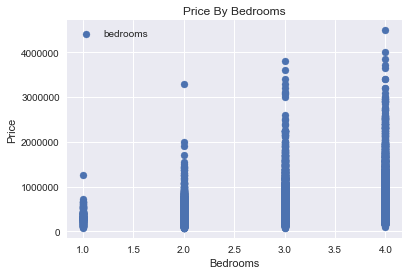

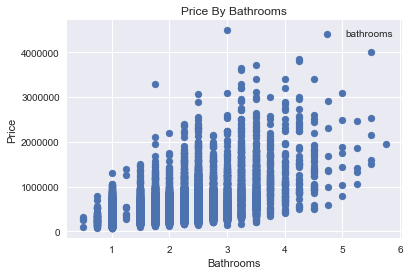

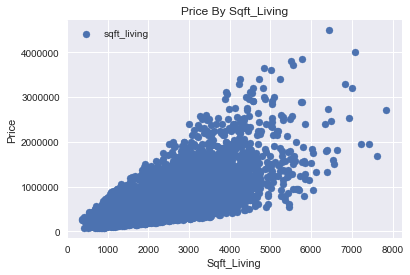

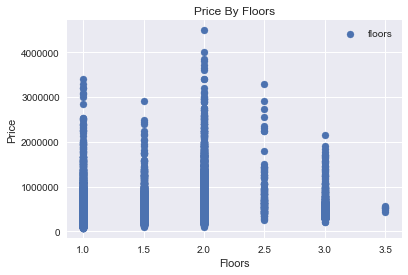

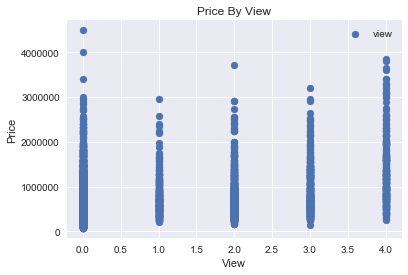

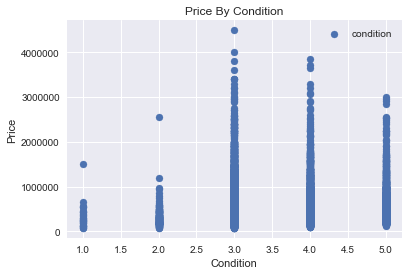

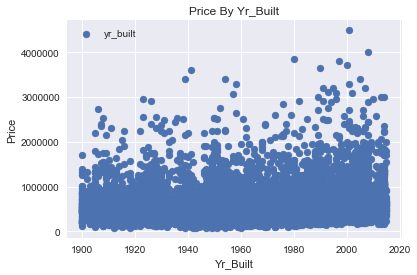

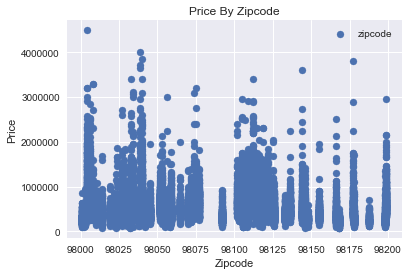

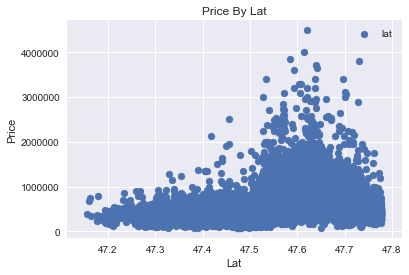

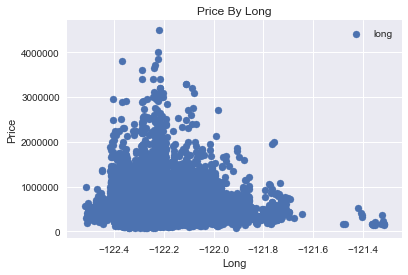

In [292]:
# using a for loop with enumerate to plot/name each feature against price
for i, column in enumerate(lin_check):
    plt.scatter(new_kd[column], new_kd.price, label=column)
    plt.legend()
    plt.title(label='Price by {}'.format(lin_check[i]).title())
    plt.xlabel(column.title())
    plt.ylabel('Price')
    plt.show()

* Notice here we also see the catagorical features and continuous features. 

### Linear model in Statsmodels

* We'll first start by running an `OLS` model on our RAW Data using `statsmodels`

In [293]:
from statsmodels.formula.api import ols

outcome = 'price'
features = ['sqft_living','bedrooms', 'bathrooms','floors', 
            'condition', 'view', 'yr_built',
            'zipcode','lat', 'long'] 
predictors = '+'.join(features)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=new_kd).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3495.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:27:16   Log-Likelihood:            -2.6624e+05
No. Observations:               19606   AIC:                         5.325e+05
Df Residuals:                   19595   BIC:                         5.326e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.989e+06   2.82e+06      3.184      0.001    3.45e+06    1.45e+07
sqft_living   246.5397      2.690     91.651      0.000     241.267     251.812
bedrooms    -4.868e+04   2416.683    -20.142      0.000   -5.34e+04   -4.39e+04
bathrooms    4.292e+04   3308.354     12.974      0.000    3.64e+04    4.94e+04
floors       4.467e+04   3196.967     13.973      0.000    3.84e+04    5.09e+04
condition    2.328e+04   2307.129     10.091      0.000    1.88e+04    2.78e+04
view         8.748e+04   1991.286     43.930      0.000    8.36e+04    9.14e+04
yr_built    -1719.6142     68.177    -25.223      0.000   -1853.247   -1585.981
zipcode      -621.6336     32.795    -18.955      0.000    -685.915    -557.352
lat          6.641e+05   1.03e+04     64.199      0.000    6.44e+05    6.84e+05
long         -1.94e+05   1.22e+04    -15.853      0.000   -2.18e+05    -1.7e+05
==============================================================================
Omnibus:                    11820.344   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           292815.613
Skew:                           2.453   Prob(JB):                         0.00
Kurtosis:                      21.286   Cond. No.                     2.03e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Preprocessing
To get more meaningful results, we'll split our data between categorical and continous.
* This will help us deal with outliers in categorical features
* This will also help normalize and scale our continouse features

#### Dealing with Categorical Data

Let's start with `yr_built`:
* We break these years down by decade with more built-in Pandas' tools.

In [294]:
new_kd['yr_bin'] = pd.cut(x = new_kd['yr_built'],
                          bins=[0,1920,1930,1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], 
                          labels=['pre-20s','20s','30s','40s', '50s', '60s', '70s', '80s', '90s', '00s','10s'])
new_kd.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,view,condition,yr_built,zipcode,lat,long,yr_bin
0,2014-10-13,221900.0,3,1.00,1180,1.0,0.0,3,1955,98178,47.5112,-122.257,50s
1,2014-12-09,538000.0,3,2.25,2570,2.0,0.0,3,1951,98125,47.7210,-122.319,50s
2,2015-02-25,180000.0,2,1.00,770,1.0,0.0,3,1933,98028,47.7379,-122.233,30s
3,2014-12-09,604000.0,4,3.00,1960,1.0,0.0,5,1965,98136,47.5208,-122.393,60s
4,2015-02-18,510000.0,3,2.00,1680,1.0,0.0,3,1987,98074,47.6168,-122.045,80s


* We can see a new column added, `yr_bin` which tells us what decade the house was built.

Now, let's take a deeper look at our `zipcode` feature to create a `zip_bin`.

In [295]:
new_kd.zipcode.describe() # Here we're looking at the zipcode stats

count    19606.000000
mean     98078.521728
std         53.447763
min      98001.000000
25%      98033.000000
50%      98070.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

In [296]:
lowest_zip = new_kd.zipcode.min() # This is the minimum zipcode
highest_zip = new_kd.zipcode.max() # This is the maximum zipcode
num_zips = highest_zip - lowest_zip # This is the total number of zipcodes
print("{}(max) - {}(min) = {}(zipcodes)".format(highest_zip, lowest_zip, num_zips))

98199(max) - 98001(min) = 198(zipcodes)


* Here we can see we have about 200 zipcodes in this features

I will use a similar tool here to categorize our zipcodes by groups of 10 nearest.

In [297]:
new_kd['zip_bin'] = pd.qcut(x = new_kd['zipcode'],q=20)

* Below you can see the new column and the categories we have defined.

In [298]:
new_kd['zip_bin'].head()

0    (98177.0, 98199.0]
1    (98118.0, 98125.0]
2    (98023.0, 98029.0]
3    (98133.0, 98155.0]
4    (98070.0, 98075.0]
Name: zip_bin, dtype: category
Categories (20, interval[float64]): [(98000.999, 98004.0] < (98004.0, 98010.0] < (98010.0, 98023.0] < (98023.0, 98029.0] ... (98125.0, 98133.0] < (98133.0, 98155.0] < (98155.0, 98177.0] < (98177.0, 98199.0]]

* Here I will convert `bedrooms`, `floors`, `condition`, and `view` into the category types as follows:  

In [299]:
new_kd['bed_cat'] = new_kd['bedrooms'].astype('category')
new_kd['floor_cat'] = new_kd['floors'].astype('category')
new_kd['condition_cat'] = new_kd['condition'].astype('category')
new_kd['view_cat'] = new_kd['view'].astype('category')

Now let's look at bathrooms. I noticed about that one bathroom was listed as 2.25.

In [300]:
new_kd.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 2.5 , 1.75, 2.75, 1.5 , 4.  , 3.25,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 0.5 , 5.5 , 5.25, 5.75])

* I'll make categories for ranges of bathrooms, ie: *'0-1', '1-2', 2-3, '4-5', and '5+'*.

In [301]:
new_kd['baths'] = pd.cut(x = new_kd['bathrooms'],
                          bins=[0,1, 2, 3, 4, 5, 6], 
                          labels=['0-1','1-2', '2-3', '3-4', '4-5', '5+'])

#### Categorical Data Visualizations

Now we will take a visual look at our categories, as they compare to home sale prices.

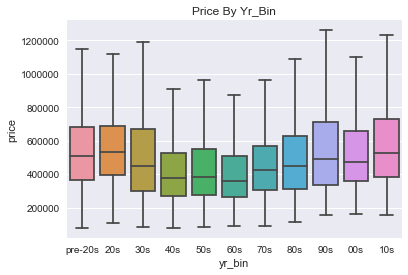

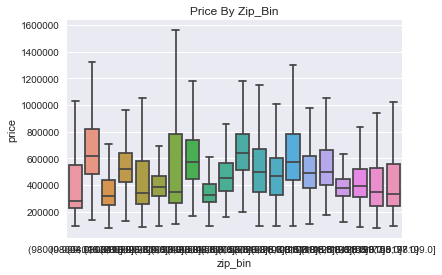

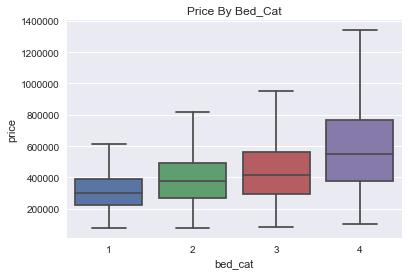

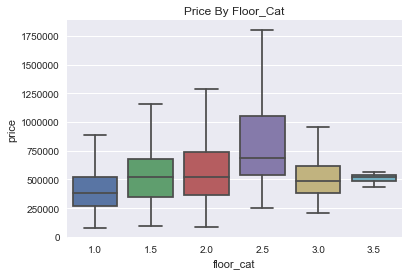

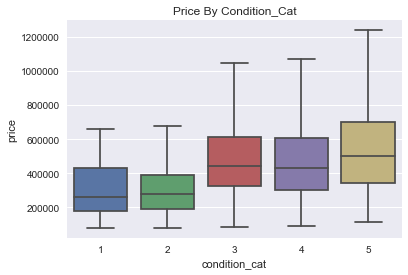

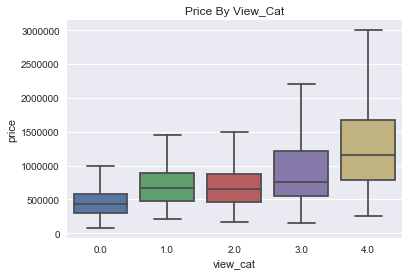

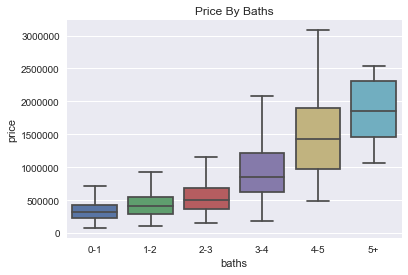

In [302]:
categoricals = ['yr_bin', 'zip_bin', 'bed_cat', 'floor_cat', 'condition_cat', 'view_cat', 'baths' ]
for i, cat in enumerate(categoricals):
    ax = sns.boxplot(x =cat, y = 'price', data=new_kd, showfliers=False)
    plt.title(label='Price by {}'.format(categoricals[i]).title())
    plt.show()

#### Countinuous Data Visualizations

* Let's also take a look at how our continuous features compare to home sale prices.

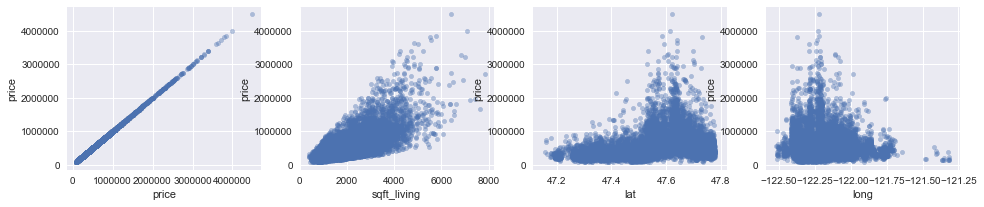

In [303]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['price', 'sqft_living','lat','long'], axes):
    new_kd.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4)

### Creating a Better Dataset

Here I will copy some old and new features into a new dataset called, called better_kd.

In [304]:
better_kd = new_kd[['price', 'sqft_living','bedrooms', 'bathrooms','floors', 
                    'condition', 'view', 'yr_built','zipcode','yr_bin','zip_bin',
                    'baths','bed_cat','floor_cat','condition_cat','view_cat', 
                    'lat', 'long']].copy()
better_kd.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19606 entries, 0 to 21596
Data columns (total 18 columns):
price            19606 non-null float64
sqft_living      19606 non-null int64
bedrooms         19606 non-null int64
bathrooms        19606 non-null float64
floors           19606 non-null float64
condition        19606 non-null int64
view             19606 non-null float64
yr_built         19606 non-null int64
zipcode          19606 non-null int64
yr_bin           19606 non-null category
zip_bin          19606 non-null category
baths            19606 non-null category
bed_cat          19606 non-null category
floor_cat        19606 non-null category
condition_cat    19606 non-null category
view_cat         19606 non-null category
lat              19606 non-null float64
long             19606 non-null float64
dtypes: category(7), float64(6), int64(5)
memory usage: 1.9 MB


##### Dealing with Continuous Features

* Here I will normalize and standardize the continuous features using the preprocessing tool, "PowerTransformer", from sklearn library. I will also import numpy to help with the math. . 

Creating a variable to storte a dataframe with continuous features.

In [305]:
cont_feat = better_kd[['price','sqft_living', 'bedrooms', 'bathrooms','floors', 
                    'condition', 'view', 'yr_built','zipcode','lat', 'long']]

In [306]:
# importing numpy to help with math
import numpy as np

/Users/jacobtadesse/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2828: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/Users/jacobtadesse/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/jacobtadesse/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2832: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)
/Users/jacobtadesse/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


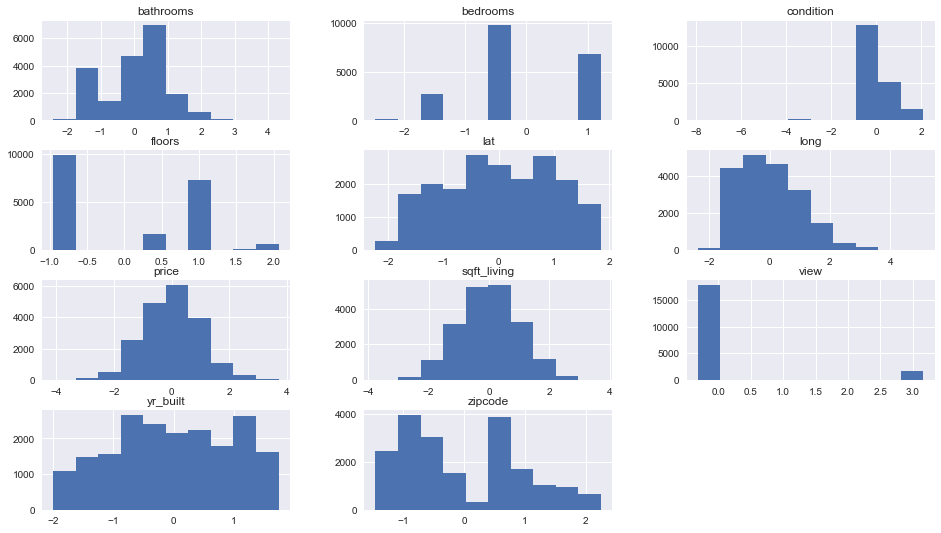

In [307]:
# importing scikit learn's preprocessing tool

from sklearn import preprocessing

# normalizing and scaling data with the power transformer

pt = preprocessing.PowerTransformer(method='yeo-johnson', 
                                    standardize=True)
kd_pt = pt.fit_transform(cont_feat) # # power transformer turns pandas series in numpy arrays.
kd_pt = pd.DataFrame(kd_pt, columns=cont_feat.columns) # Must convert back to DataFrame for .hist() 

kd_pt.hist(figsize=(16,9));

### Model after standardization & normalization

* Here I'll combine the new features and run an OLS model.

In [308]:
outcome = 'price'
features = ['sqft_living','bedrooms', 'bathrooms','floors', 
                    'condition', 'view', 'yr_built','zipcode','yr_bin','zip_bin',
                    'baths','bed_cat','floor_cat','condition_cat','view_cat', 
                    'lat', 'long']
predictors = '+'.join(features)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=better_kd).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     781.7
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:27:20   Log-Likelihood:            -2.6475e+05
No. Observations:               19606   AIC:                         5.296e+05
Df Residuals:                   19549   BIC:                         5.301e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                              -1.12e+08   2.67e+07     -4.197      0.000   -1.64e+08   -5.97e+07
yr_bin[T.20s]                                          2.842e+04   9541.192      2.979      0.003    9722.263    4.71e+04
yr_bin[T.30s]                                          2.941e+04   1.42e+04      2.073      0.038    1608.007    5.72e+04
yr_bin[T.40s]                                          6169.0962   1.62e+04      0.382      0.703   -2.55e+04    3.78e+04
yr_bin[T.50s]                                          1.027e+04   1.99e+04      0.516      0.606   -2.88e+04    4.93e+04
yr_bin[T.60s]                                          4556.9494   2.39e+04      0.190      0.849   -4.24e+04    5.15e+04
yr_bin[T.70s]                                          7086.4775   2.83e+04      0.250      0.802   -4.84e+04    6.26e+04
yr_bin[T.80s]                                          3.904e+04   3.22e+04      1.213      0.225    -2.4e+04    1.02e+05
yr_bin[T.90s]                                          6.205e+04   3.61e+04      1.720      0.085   -8672.205    1.33e+05
yr_bin[T.00s]                                          6.648e+04      4e+04      1.663      0.096   -1.19e+04    1.45e+05
yr_bin[T.10s]                                          1.178e+05   4.35e+04      2.709      0.007    3.26e+04    2.03e+05
zip_bin[T.Interval(98004.0, 98010.0, closed='right')] -1.305e+04   8650.566     -1.508      0.132      -3e+04    3910.441
zip_bin[T.Interval(98010.0, 98023.0, closed='right')] -1.919e+05   9802.159    -19.574      0.000   -2.11e+05   -1.73e+05
zip_bin[T.Interval(98023.0, 98029.0, closed='right')] -1.462e+05   1.23e+04    -11.893      0.000    -1.7e+05   -1.22e+05
zip_bin[T.Interval(98029.0, 98033.0, closed='right')] -1.267e+05   1.25e+04    -10.126      0.000   -1.51e+05   -1.02e+05
zip_bin[T.Interval(98033.0, 98038.0, closed='right')] -1.689e+05    1.4e+04    -12.059      0.000   -1.96e+05   -1.41e+05
zip_bin[T.Interval(98038.0, 98042.0, closed='right')] -2.315e+04   1.56e+04     -1.488      0.137   -5.36e+04    7347.074
zip_bin[T.Interval(98042.0, 98053.0, closed='right')] -1.455e+05   1.87e+04     -7.779      0.000   -1.82e+05   -1.09e+05
zip_bin[T.Interval(98053.0, 98058.0, closed='right')] -2.121e+05   1.94e+04    -10.942      0.000    -2.5e+05   -1.74e+05
zip_bin[T.Interval(98058.0, 98070.0, closed='right')] -2.017e+05   2.18e+04     -9.270      0.000   -2.44e+05   -1.59e+05
zip_bin[T.Interval(98070.0, 98075.0, closed='right')] -1.811e+05   2.53e+04     -7.159      0.000   -2.31e+05   -1.31e+05
zip_bin[T.Interval(98075.0, 98103.0, closed='right')] -2.004e+05   3.09e+04     -6.491      0.000   -2.61e+05    -1.4e+05
zip_bin[T.Interval(98103.0, 98107

### Feature engineering:


Here I will engineer some features that may help us predict the sales price:
* $/sqft = Price per Square Foot
* bath/bed = ratio of bathrooms to bedrooms
* bath/sqft = bathrooms per square foot of living
* bed/sqft = bedrooms per square foot of living

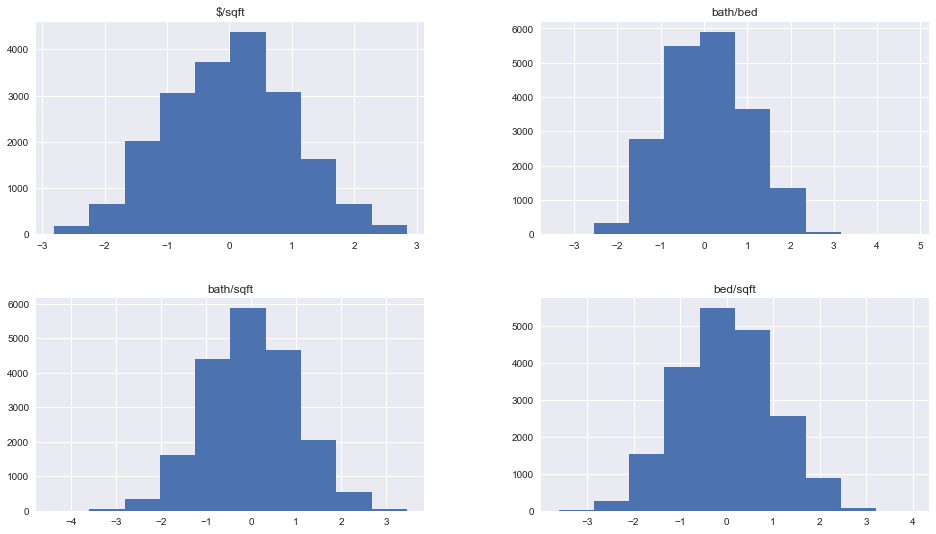

In [309]:
# Feature engineering:

better_kd['$/sqft'] = new_kd.price / new_kd.sqft_living
better_kd['bath/bed'] = kd.bathrooms / new_kd.bedrooms
better_kd['bath/sqft'] = new_kd.bathrooms / new_kd.sqft_living
better_kd['bed/sqft'] = new_kd.bedrooms / new_kd.sqft_living

cont_feat = better_kd[['$/sqft','bath/bed','bath/sqft','bed/sqft']]

# normalizing and scaling data with power transform
pt = preprocessing.PowerTransformer(method='yeo-johnson', 
                                    standardize=True)

df_pt = pt.fit_transform(cont_feat) # power transformer turns pandas series in numpy arrays. 
df_pt = pd.DataFrame(df_pt, columns=cont_feat.columns) # Must convert back to DataFrame for df.hist()

df_pt.hist(figsize=(16,9));

Let's check for colinearity amongst our new features:

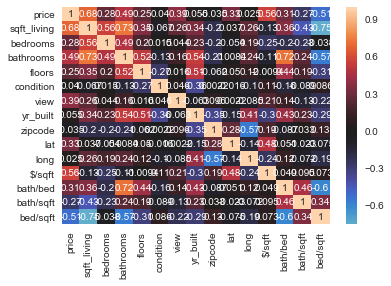

In [310]:
sns.heatmap(better_kd.corr(), center=0, fmt='.2g', annot=True);

In [382]:
better_kd.corr()[better_kd.corr()>.75]

,price,sqft_living,bedrooms,bathrooms,floors,condition,view,yr_built,zipcode,lat,long,$/sqft,bath/bed,bath/sqft,bed/sqft
price,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr_built,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
lat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


### Model with Engineered Features

Now that we have new features (which have been normalized and scaled using the PowerTransformer), I will use another sklearn tool called, RFE, or recursive feature elimination. This tool will help rank the new features to see which one is best.

* Here we will define the continuous features to use in the RFE.

In [367]:
new_cont_feats = ['$/sqft','bath/bed','bath/sqft','bed/sqft', 
                  'sqft_living']

* Here we will set our X values as our new continuous featues
* And we will set our Y value as our prediction target, 'price'.

In [368]:
X = better_kd[new_cont_feats]
y = better_kd['price']

* Here we will use the feature_selection tool from sklearn to use RFE
* We will also use the linear_model tool from sklearn to use LinearRegression

In [369]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5) # selecting to 5 features
selector = selector.fit(X, y.values.ravel()) 
    # convert y to 1d np array to prevent DataConversionWarning
selector.support_ 

array([ True,  True,  True,  True,  True])

### Top Five Features:

Defining a function to print top three items with number in rank.

In [535]:
def top_five(selector):
    """Return the order number and name of each feature in the passed in selector."""
    for i, each in enumerate(selector):
        print('# {} Feature:'.format(i+1),selector[i])

In [536]:
top_five.__doc__

'Return the order number and name of each feature in the passed in selector.'

Defining a variable to store features and coefficients.

In [371]:
top_feats = X.columns[selector.support_]
top_coefs = selector.estimator_.coef_

In [372]:
# RFE tools for top 5 features
top_five(top_feats)

# 1 Feature: $/sqft
# 2 Feature: bath/bed
# 3 Feature: bath/sqft
# 4 Feature: bed/sqft
# 5 Feature: sqft_living


In [373]:
# RFE tools for top 5 coefficients
top_five(top_coefs)

# 1 Feature: 1912.4826039406862
# 2 Feature: 116396.5092674054
# 3 Feature: -56294303.86821979
# 4 Feature: 52089047.40509549
# 5 Feature: 300.7418817081563


### Fitting the linear regression model using the 3 features

In [374]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Defining the prediction model

In [375]:
yhat = linreg.predict(X[selected_columns])

* Determining R_squared and adjusted_R_squared

In [376]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [377]:
r_squared

0.8922987434967452

In [378]:
adjusted_r_squared

0.8922712686864127

#### Checking multicolinearity

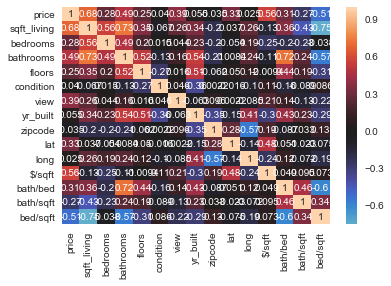

In [379]:
sns.heatmap(better_kd.corr(), center=0, fmt='.2g', annot=True);

In [407]:
better_kd.corr()

,price,sqft_living,bedrooms,bathrooms,floors,condition,view,yr_built,zipcode,lat,long,$/sqft,bath/bed,bath/sqft,bed/sqft
price,1.000000,0.679758,0.276682,0.491460,0.250129,0.039723,0.388179,0.055127,-0.034627,0.332299,0.025473,0.563920,0.307906,-0.265396,-0.512983
sqft_living,0.679758,1.000000,0.562677,0.727288,0.352717,-0.066887,0.257766,0.341850,-0.204610,0.037495,0.261262,-0.126311,0.358741,-0.434542,-0.752448
bedrooms,0.276682,0.562677,1.000000,0.491233,0.202992,0.015153,0.043547,0.229728,-0.197951,-0.053820,0.188245,-0.252113,-0.201107,-0.231013,-0.037891
bathrooms,0.491460,0.727288,0.491233,1.000000,0.522507,-0.134089,0.158372,0.544270,-0.214802,0.008439,0.240924,-0.114796,0.720471,0.241366,-0.567395
floors,0.250129,0.352717,0.202992,0.522507,1.000000,-0.267615,0.016424,0.511445,-0.061703,0.049748,0.121526,-0.009431,0.435452,0.193184,-0.313998
condition,0.039723,-0.066887,0.015153,-0.134089,-0.267615,1.000000,0.045617,-0.358805,0.002241,-0.016064,-0.103776,0.106419,-0.155591,-0.088974,0.086229
view,0.388179,0.257766,0.043547,0.158372,0.016424,0.045617,1.000000,-0.063334,0.095633,0.002225,-0.084826,0.213219,0.135407,-0.131409,-0.222748
yr_built,0.055127,0.341850,0.229728,0.544270,0.511445,-0.358805,-0.063334,1.000000,-0.349364,-0.148446,0.406314,-0.301548,0.431757,0.228340,-0.290084
zipcode,-0.034627,-0.204610,-0.197951,-0.214802,-0.061703,0.002241,0.095633,-0.349364,1.000000,0.277015,-0.565103,0.193611,-0.087460,0.033323,0.131627
lat,0.332299,0.037495,-0.053820,0.008439,0.049748,-0.016064,0.002225,-0.148446,0.277015,1.000000,-0.135890,0.483684,0.051424,-0.023235,-0.074751


I see here that `sqft_living` has a 67% correlation to price, and `$/sqft` has a 56% correlation to price. So the more living space the more money the house will cost! On the other side, `bed/sqft` has a negative correlation to price. Meaning, if your living space is the same size as your bedroom space, that may be an efficiency (with no bathroom). I will use these three features along with the other two to fit a train test split model to predict house prices based on these features: `['$/sqft','bath/bed','bath/sqft','bed/sqft','sqft_living']`

### Train-Test-Split

* Here we will use our best features to train our model on 80& of the data, and then testing our model on the remaining 20% of our dataset.  and test our data across various splits.

In [383]:
best_feat = ['$/sqft','bath/bed','bath/sqft','bed/sqft', 
                  'sqft_living']

In [384]:
from sklearn.model_selection import train_test_split
X = better_kd[best_feat]
y = better_kd['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [385]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15684 3922 15684 3922


In [386]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [387]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

* Here I will use the metrics from sklearn to utilize the mean_square_error tool.

In [388]:
from sklearn.metrics import mean_squared_error


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 10762973643.994843
Test Mean Squarred Error: 11709630906.923727


* Let's check the percent difference between the train and the test MSE

In [583]:
difference = ((train_mse-test_mse)/np.mean(train_mse+test_mse))*100
print('Difference between train error and test error:{}%'.format(round(difference,2)))

Difference between train error and test error:-4.21%


We can now see the difference between our train MSE and test MSE.

### Cross-Validation using Scikit-Learn

To close out, we will use the cross-validation's cross_val_score. We will use K-fold cross validation to test how well the model performs.

In [411]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_1000_results = np.mean(cross_val_score(linreg, X, y, cv=1000, scoring="neg_mean_squared_error"))
-cv_1000_results

10978008506.124075

### Saving both databases as .csv files for public use

In [581]:
new_kd.to_csv('new_kd.csv')

In [582]:
better_kd.to_csv('better_kd.csv')

## Questions from Potential Investor Moving to King County:

### Where are houses selling in King County?

In [531]:
# mapping houses sold in king county

import folium # import library for mapping
import numpy as np

lat = new_kd.lat.mean() # middle point of Lat
lon = new_kd.long.mean() # middle point of Long

lats = new_kd.lat # all Lats
lons = new_kd.long # all Longs

# Initiating map with mid points
kc_map = folium.Map(location=[lat, lon], 
                    zoom_start=10.25)

# pairng (lat,long)
locations = list(zip(lats,lons)) 

# function to create and add each marker to the map
def make_add(coordinates, the_map):
    """Creates markers for all `coordinates` passed, and adds onto `the_map`.  """
    
    markers = {}
    for i, ea in enumerate(coordinates):
        markers[i] = folium.CircleMarker(
            location = ea,radius=.05, 
            tiles='stamentoner',popup='SOLD')
        markers[i].add_to(the_map) 

markers = make_add(locations, kc_map) # initiating function
kc_map # printing map
kc_map.save('kc_map.html') # saving map

In [532]:
make_add.__doc__

'Creates markers for all `coordinates` passed, and adds onto `the_map`.  '

In [577]:
# adding heat map for number of all home sales
import folium.plugins as plugins # plugin for HeatMap
# Initiating map with mid points
kc_hm = folium.Map(location=[lat, lon], 
                    zoom_start=10.25)
kc_hm
# creating HeatMap w/ location and price for hue
location2 = list(zip(lats,lons,new_kd.view_cat)) 
hm = plugins.HeatMap(data=location2, radius=8 , blur=4.8, 
                     overlay=True) 
hm.add_to(kc_hm) # adding heatmap overlay
kc_hm.save('kc_heatmap.html') # saving map

### What's the average price to sell in the KC housing market?

#### Summary Statistics


In [398]:
print('The average price to sell a home in King County is ${}'.
      format(round(new_kd.price.mean(), 2)) # Rounding the mean price
)

print('The highest price a home sold for in King County was ${}'.
     format(round(new_kd.groupby(by='zip_bin').
        max()['price'].max(),2)) # Rounding the max price found
)
print('The lowest price a home sold for in King County was ${}'.
     format(round(new_kd.groupby(by='zip_bin').
        min()['price'].min(),2)) # Rounding the min price found
)

The average price to sell a home in King County is $514942.72
The highest price a home sold for in King County was $4490000.0
The lowest price a home sold for in King County was $78000.0


#### Highest Average Home Sale Prices by Zipcode


In [400]:
print('\n>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
print('Top 10 Zipcodes where Average Home Sales Prices '+ 
      'are Highest in King County')
print('\n.............................')
display(new_kd.groupby(by='zip_bin'). # Grouping by zip 
        mean()['price'].sort_values(ascending=False)[:10]) 
        # Sorting by mean price
print('\n.............................')
print('\n.............................')
print('\n.............................')


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Top 10 Zipcodes where Average Home Sales Prices are Highest in King County

.............................


zip_bin
(98004.0, 98010.0]    702274.574619
(98107.0, 98115.0]    684157.666019
(98070.0, 98075.0]    673850.871768
(98042.0, 98053.0]    605841.553944
(98038.0, 98042.0]    596284.922975
(98118.0, 98125.0]    575376.401242
(98023.0, 98029.0]    557355.684052
(98075.0, 98103.0]    537572.450128
(98103.0, 98107.0]    524145.336499
(98115.0, 98118.0]    520601.192696
Name: price, dtype: float64


.............................

.............................

.............................


#### Lowest Average Home Sale Prices by Zipcode 

In [401]:
print('Top 10 Zipcodes where Average Home Sale Prices '+
      'are Lowest in King County')
print('\n.............................')
display(new_kd.groupby(by='zip_bin'). # Grouping by zip
        mean()['price'].sort_values(ascending=True)[:10]) 
        # Sorting by mean price
print('\n.............................')
print('\n.............................')
print('\n.............................')

Top 10 Zipcodes where Average Home Sale Prices are Lowest in King County

.............................


zip_bin
(98010.0, 98023.0]      353409.024180
(98053.0, 98058.0]      357778.580897
(98125.0, 98133.0]      397242.578223
(98033.0, 98038.0]      435881.412488
(98155.0, 98177.0]      440502.699577
(98177.0, 98199.0]      448256.951860
(98133.0, 98155.0]      451345.116315
(98029.0, 98033.0]      466833.193159
(98058.0, 98070.0]      493247.702128
(98000.999, 98004.0]    496275.380814
Name: price, dtype: float64


.............................

.............................

.............................


#### Average Home Sale Price by Year Built / Age of Home

In [402]:
print('The Age of King County Homes and Their Average '+
      'Sale Prices in King County')
print('\n.............................')
display(new_kd.groupby(by='yr_bin'). # Grouping by yr built
        mean()['price']) 
print('\n.............................')
print('\n.............................')
print('\n.............................')

The Age of King County Homes and Their Average Sale Prices in King County

.............................


yr_bin
pre-20s    557773.624909
20s        586123.360444
30s        560222.874317
40s        435357.767338
50s        457577.499102
60s        429311.303989
70s        477996.719216
80s        520846.034607
90s        574536.941147
00s        566993.072575
10s        602808.000000
Name: price, dtype: float64


.............................

.............................

.............................


#### Average Home Sale Price by # of Bedrooms

In [499]:
print('Average Sale Price by # of Bedrooms for each Home in'+
      'King County')
display(round(new_kd.groupby(by='bed_cat').mean()['price'],0))
print('\n.............................')
print('Median Sale Price by # of Bedrooms for each Home in'+
      'King County')
display(round(new_kd.groupby(by='bed_cat').median()['price'],0))


Average Sale Price by # of Bedrooms for each Home inKing County


bed_cat
1    318239.0
2    401460.0
3    466353.0
4    635384.0
Name: price, dtype: float64


.............................
Median Sale Price by # of Bedrooms for each Home inKing County


bed_cat
1    299000.0
2    374475.0
3    413000.0
4    549950.0
Name: price, dtype: float64

In [477]:
print('Minimum Sale Price by # of Bedrooms for each Home in '+
      'King County')
print('\n.............................')
display(new_kd.groupby(by='bed_cat'). # Grouping by bedroom #
        min()['price'].sort_values(ascending=True))
print('\n.............................')
print('\n.............................')
print('\n.............................')
print('Maximum Sale Price by # of Bedrooms for each Home in '+
      'King County')
print('\n.............................')
display(new_kd.groupby(by='bed_cat'). # Grouping by bedroom #
        max()['price'].sort_values(ascending=False))
print('\n.............................')
print('\n.............................')
print('\n.............................')

Minimum Sale Price by # of Bedrooms for each Home in King County

.............................


bed_cat
2     78000.0
1     80000.0
3     82000.0
4    100000.0
Name: price, dtype: float64


.............................

.............................

.............................
Maximum Sale Price by # of Bedrooms for each Home in King County

.............................


bed_cat
4    4490000.0
3    3800000.0
2    3280000.0
1    1250000.0
Name: price, dtype: float64


.............................

.............................

.............................


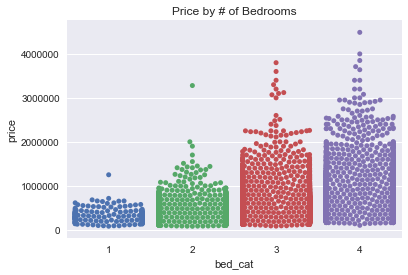

In [455]:
sns.swarmplot(x='bed_cat', y='price', data=new_kd, size=5);
plt.title(label='Price by # of Bedrooms')
plt.show()

#### Minimun Home Sale Price by # of Bathrooms

In [500]:
print('Average Sale Price by # of Bathrooms for each Home in'+
      'King County')
display(round(new_kd.groupby(by='baths').mean()['price'],0))
print('\n.............................')
print('Median Sale Price by # of Bathrooms for each Home in'+
      'King County')
display(round(new_kd.groupby(by='baths').median()['price'],0))

Average Sale Price by # of Bathrooms for each Home inKing County


baths
0-1     343994.0
1-2     443303.0
2-3     566166.0
3-4     994823.0
4-5    1558058.0
5+     1985455.0
Name: price, dtype: float64


.............................
Median Sale Price by # of Bathrooms for each Home inKing County


baths
0-1     317750.0
1-2     407450.0
2-3     503000.0
3-4     850000.0
4-5    1430000.0
5+     1860000.0
Name: price, dtype: float64

In [404]:
print('Minimum Sale Price by # of Bathrooms for each Home in '+
      'King County')
print('\n.............................')
display(new_kd.groupby(by=['baths']). # Grouping by bathroom #
        min()['price'])
print('\n.............................')
print('\n.............................')
print('\n.............................')
# Maximum price to sell by bathrooms
print('Maximum Sale Price by # of Bathrooms for each Home in '+
      'King County')
print('\n.............................')
display(new_kd.groupby(by=['baths']).
        max()['price'])

Minimum Sale Price by # of Bathrooms for each Home in King County

.............................


baths
0-1      78000.0
1-2     107000.0
2-3     153503.0
3-4     176000.0
4-5     490000.0
5+     1060000.0
Name: price, dtype: float64


.............................

.............................

.............................
Maximum Sale Price by # of Bathrooms for each Home in King County

.............................


baths
0-1    1300000.0
1-2    3280000.0
2-3    4490000.0
3-4    3710000.0
4-5    3850000.0
5+     4000000.0
Name: price, dtype: float64

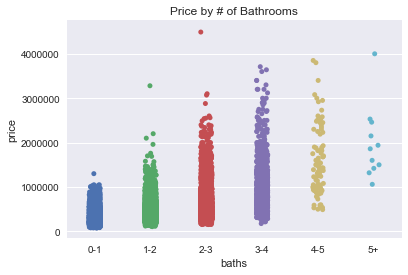

In [456]:
sns.stripplot(x='baths', y='price', data=new_kd)
plt.title(label='Price by # of Bathrooms')
plt.show()

### What features correlate to higher home prices? 

In [405]:
# Using Recurssive Feature Elimination, we can 
# see which features correlate higher to price
# X.columns[selector.support_]
top_five(top_feats)
print('---------------------------')
top_five(top_coefs)


# 1 Feature: $/sqft
# 2 Feature: bath/bed
# 3 Feature: bath/sqft
# 4 Feature: bed/sqft
# 5 Feature: sqft_living
---------------------------
# 1 Feature: 1912.4826039406862
# 2 Feature: 116396.5092674054
# 3 Feature: -56294303.86821979
# 4 Feature: 52089047.40509549
# 5 Feature: 300.7418817081563


### My recommendations for higher priced sell:

In order to increase the price of your home, we must take into consideration the features with a high and positive correlation to price. If we look at the coefficients of the top 5 features we selected, we can see that one is highly correlated, but negatively towards the price. This one feature is one of the engineered features, `bath/sqft`. Now think about that if your bathroom is as big as your living space, you're living in the toilet, and no one would want to buy your house. 

On the other hand, the other four features show lower but positive correlation, ie: `sqft_living`, `bed/sqft`, `bath/bed`, and `$/sqft`.

I would recommend rennovations to increase your price. If you are able to get more space from your bedroom space, living space, and add more bathrooms per bedroom, you can increase your price to sell. Below you will see how I came up with there features and tested them out on the King County Housing Dataset.

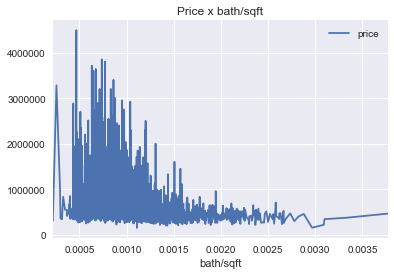

In [518]:
basf = pd.DataFrame(better_kd.groupby(by='bath/sqft').median()['price']).reset_index()
basf.plot(kind='line', x='bath/sqft',y='price')
plt.title('Price x bath/sqft');

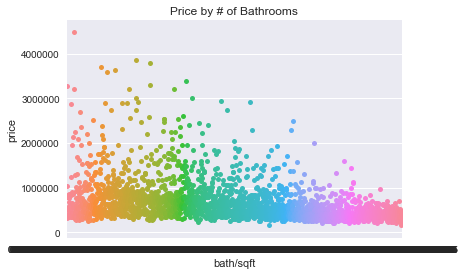

In [522]:
sns.stripplot(x='bath/sqft', y='price', data=basf)
plt.title(label='Price by Bathrooms per square foot')
plt.show()

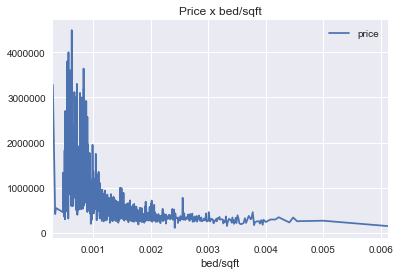

In [520]:
besf = pd.DataFrame(better_kd.groupby(by='bed/sqft').median()['price']).reset_index()
besf.plot(kind='line', x='bed/sqft',y='price')
plt.title('Price by Bedrooms per square foot');

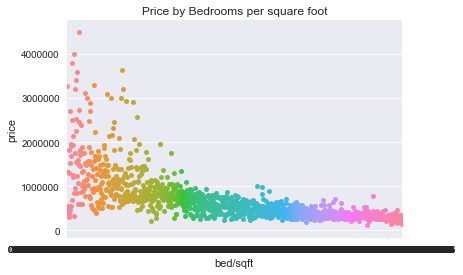

In [525]:
sns.stripplot(x='bed/sqft', y='price', data=besf)
plt.title(label='Price by Bedrooms per square foot')
plt.show()

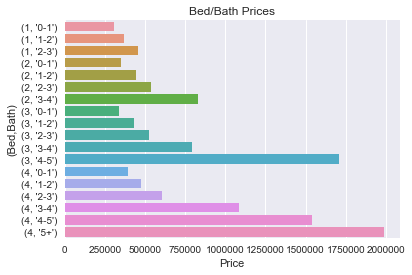

In [576]:
hey = pd.DataFrame(better_kd.groupby(by=['bed_cat', 'baths']).price.mean())
# hey.plot.barh()
sns.barplot(x='price', y=hey.index, data=hey)
plt.title('Bed/Bath Prices')
plt.ylabel('(Bed,Bath)')
plt.xlabel('Price')
plt.show()

### Importing the Dataset:

Here I am importing the pandas library to read the .csv data, `"kc_house_data.csv"`.

In [269]:
import pandas as pd

kd = pd.read_csv("kc_house_data.csv")